In [21]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pl.read_csv("scores.csv")
df.head()

Algorithm,Length,Trial,Cost
str,i64,i64,f64
"""bubble""",10,1,373.0
"""bubble""",10,2,403.0
"""bubble""",10,3,390.0
"""bubble""",10,4,415.0
"""bubble""",10,5,455.0


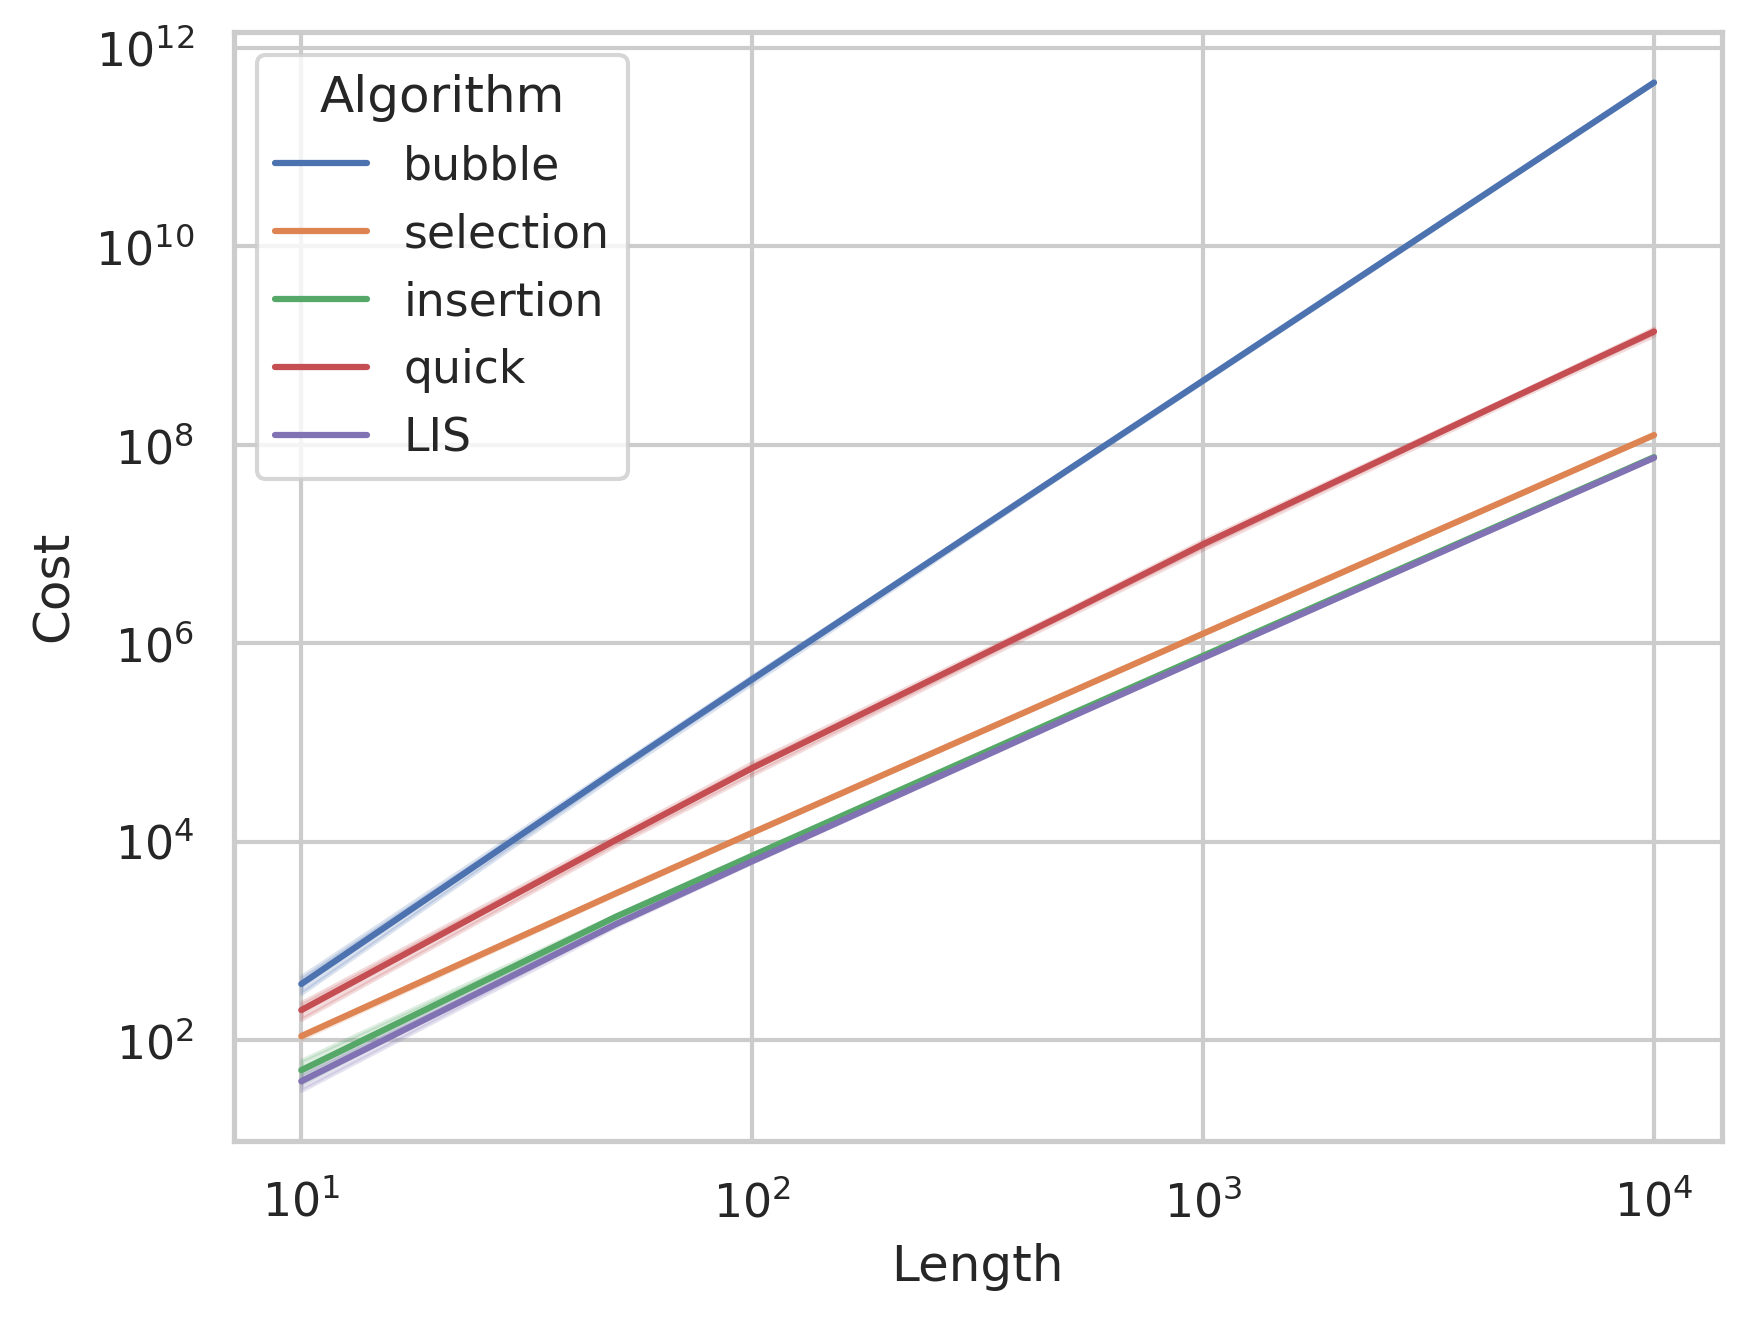

In [24]:
# Plot
plt.figure(dpi=300)
sns.set_theme(style="whitegrid")
sns.lineplot(data=df.to_pandas(), x="Length", y="Cost", hue="Algorithm", err_style="band", errorbar="sd")

plt.xscale("log")
plt.yscale("log")
plt.savefig("scores_plot.svg")
plt.show()
